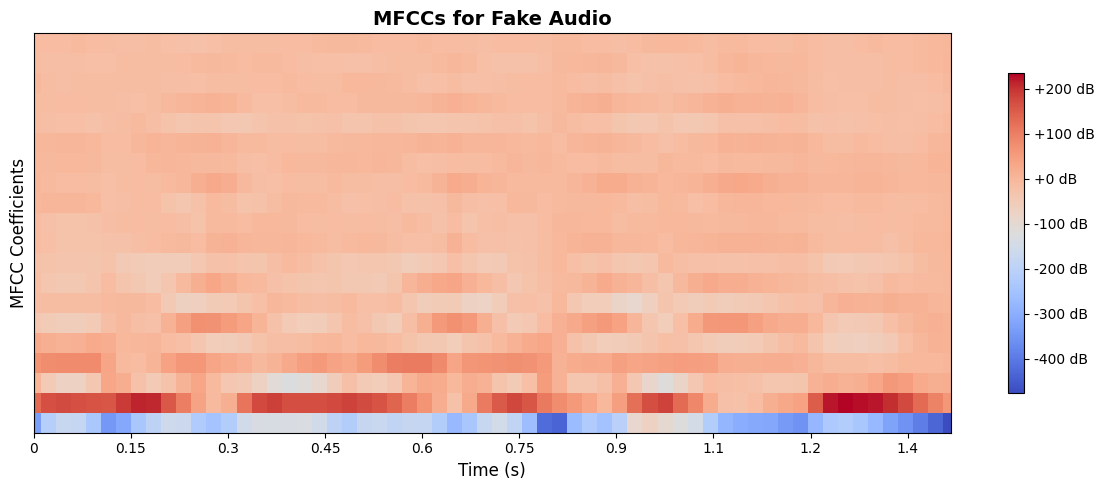

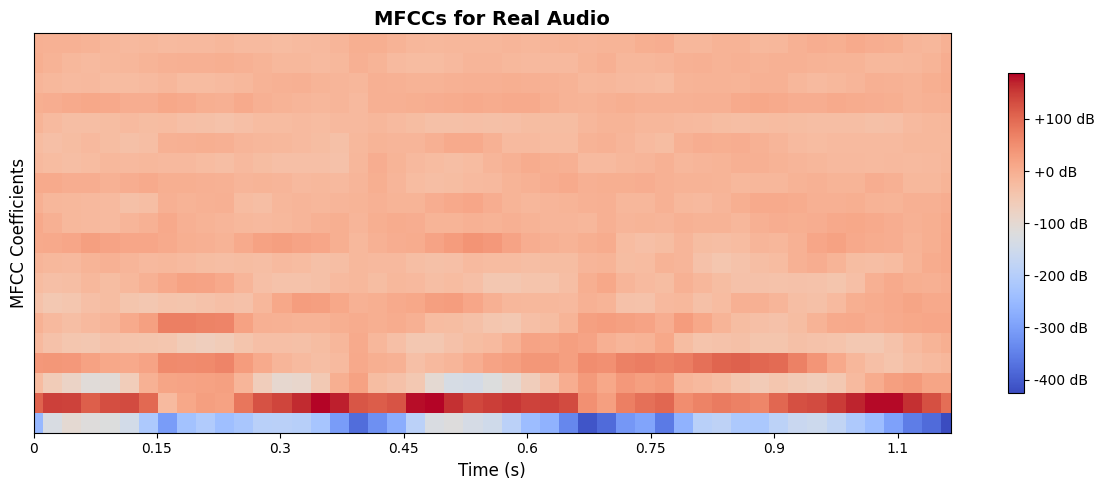

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_mfcc(file_path, title):
    """
    Calculates and plots the MFCCs for a given audio file with silence trimming.

    Args:
        file_path (str): The path to the audio file.
        title (str): The title of the plot.
    """
    try:
        y, sr = librosa.load(file_path)  # Load audio file

        # Trim silent or low-energy parts
        y_trimmed, _ = librosa.effects.trim(y, top_db=30)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mfcc=20)

        # Time Axis Mapping
        frames = np.arange(mfccs.shape[1])
        time = librosa.frames_to_time(frames, sr=sr)

        # Plot with removed empty sections
        plt.figure(figsize=(12, 5))
        librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')

        plt.colorbar(format='%+2.0f dB', shrink=0.8)
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel("Time (s)", fontsize=12)
        plt.ylabel("MFCC Coefficients", fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.xlim([0, time[-1]])  # Remove unnecessary blank parts on the right
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Example usage:
fake_audio_file = "FAKE.flac"  # Replace with actual path
real_audio_file = "REAL.flac"  # Replace with actual path

# Generate MFCC plots with unnecessary empty parts removed
plot_mfcc(fake_audio_file, "MFCCs for Fake Audio")
plot_mfcc(real_audio_file, "MFCCs for Real Audio")


In [ ]:
import librosa
import numpy as np
import os

# Fixed duration in seconds
FIXED_DURATION = 4  # 4 seconds
SPEC_HEIGHT = 50  # Number of mel bands
SPEC_WIDTH = 50   # Number of time frames

# Function to load, pad/crop, and extract Mel spectrogram matrix
def extract_melspectrogram(file_path, fixed_duration=FIXED_DURATION):
    y, sr = librosa.load(file_path, sr=None)  # Load at native sampling rate
    target_length = sr * fixed_duration  # Desired number of samples

    # Crop or pad the audio to exactly 4 seconds
    if len(y) > target_length:
        y = y[:target_length]  # Truncate if too long
    else:
        y = np.pad(y, (0, max(0, target_length - len(y))), mode='constant')  # Pad with zeros

    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=SPEC_HEIGHT)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Convert to decibels

    # Resize the spectrogram to 50x50
    mel_spec_resized = librosa.util.fix_length(mel_spec_db, size=SPEC_WIDTH, axis=1)  # Time-axis resizing

    return mel_spec_resized

# Path to a single audio file
audio_file = "/content/LA_D_1024892.flac"

# Extract Mel spectrogram
mel_spectrogram = extract_melspectrogram(audio_file)

# Print the extracted Mel spectrogram
print("Extracted Mel Spectrogram:")
print(mel_spectrogram)


Extracted Mel Spectrogram:
[[-53.07825  -53.339188 -53.657433 ... -52.16075  -50.518303 -48.930504]
 [-53.631317 -52.4477   -53.609283 ... -42.115585 -48.374    -45.69022 ]
 [-63.29179  -58.014748 -59.069122 ... -32.421715 -46.51789  -32.148216]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]
